In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Timestamp
from tqdm import tqdm


# Reading the data

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [ ]:
# df_info = pd.read_csv('data_files/SignalDoc.csv')
# df_info

In [ ]:
data_df = pd.read_csv('data_files/crspm_and_predictors.csv')
data_df

,permno,yyyymm,prc,ret,Price,Size,STreversal,MaxRet,High52,RealizedVol,...,MomSeason06YrPlus,MomOffSeason06YrPlus,grcapx,EntMult,Investment,PctTotAcc,EarnSupBig,EarningsSurprise,BetaTailRisk,CBOperProf
0,10659,199102,-0.17188,-15.3846,1.760959,-8.844859,15.3846,0.000000,0.407414,-0.035295,...,NaN,NaN,0.799007,NaN,NaN,0.795044,-0.379424,-0.109776,NaN,-0.371791
1,10659,199103,-0.10938,-36.3636,2.212927,-8.392890,36.3636,0.000000,0.259268,-0.065733,...,NaN,NaN,0.799007,NaN,NaN,0.795044,-0.483346,-0.109776,NaN,-0.371791
2,10659,199104,-0.21875,100.0000,1.519826,-9.085992,-100.0000,-0.571429,0.518512,-0.127870,...,NaN,NaN,0.802281,NaN,-0.043613,0.439730,-0.470160,-0.050594,NaN,-0.138481
3,10659,199105,-0.21875,0.0000,1.519826,-9.085992,0.0000,-0.142857,0.518512,-0.045962,...,NaN,NaN,0.802281,NaN,-0.046697,0.439730,-0.498256,-0.050594,NaN,-0.138481
4,10659,199106,-0.20313,-7.1429,1.593909,-9.011908,7.1429,0.000000,0.481488,-0.015972,...,NaN,NaN,0.802281,NaN,-0.050251,0.439730,-0.116901,-0.050594,NaN,-0.138481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994023,10232,198604,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994024,10274,198604,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994025,10301,198604,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994026,10326,198605,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rf_rates = pd.read_csv('TB3MS.csv')
rf_rates

,observation_date,TB3MS
0,1934-01-01,0.72
1,1934-02-01,0.62
2,1934-03-01,0.24
3,1934-04-01,0.15
4,1934-05-01,0.16
...,...,...
1089,2024-10-01,4.51
1090,2024-11-01,4.42
1091,2024-12-01,4.27
1092,2025-01-01,4.21


In [ ]:
# # it is giving diff rows every time,
# # every time rows are increasing, maybe due to some limits of colab
# df = pd.read_csv('sample.csv', low_memory=False, engine='c')
# df.shape

(139647, 120)

In [ ]:
rf_rates['observation_date'] = pd.to_datetime(rf_rates['observation_date'], format='%Y-%m-%d')
data_df['yyyymm'] = pd.to_datetime(data_df['yyyymm'], format='%Y%m') #df.loc[:, 'yyyymm']

In [ ]:
df_init = pd.merge(data_df, rf_rates, left_on='yyyymm',
                        right_on='observation_date', how='left')

df_init.drop(columns=['observation_date'], inplace=True)
df_init.rename(columns={'TB3MS': 'RiskFree', 'yyyymm': 'date'}, inplace=True)
df_init['ExcessReturn'] = df_init['ret'] - df_init['RiskFree']
df_init.reset_index(drop=True, inplace=True)

not_pred = ['permno', 'date', 'prc', 'ret', 'Price', 'RiskFree', 'ExcessReturn']
pred = [c for c in df_init.columns if c not in not_pred]

x = df_init.drop(columns=not_pred).copy()
y = df_init['ExcessReturn'].copy()
correlations = x.corrwith(y)
correlations.sort_values(ascending=False, inplace=True)

correlations


# Sampling /skiping for now

In [ ]:
# need to be changed according to data
filtered_tb3ms = rf_rates[(rf_rates['observation_date'] >= '1990-01-01') &
                          (rf_rates['observation_date'] <= '2000-12-01')]

filtered_tb3ms.reset_index(drop=True, inplace=True)

In [ ]:
df = data_df.copy()
df = df[(df['yyyymm'] >= '1990-01-01') &
        (df['yyyymm'] <= '2000-12-01')]
df.reset_index(drop=True, inplace=True)

# Cleaning

Variables: The dataset includes a unique firm identifier (permno), date,
 stock price (prc), stock return in percentage units adjusted for delisting (ret), and a variable named Signed Price (Price). In addition, there are 114 predictor variables (signals).

In [ ]:
# Merge the DataFrames based on the date columns
merged_df = pd.merge(df, filtered_tb3ms, left_on='yyyymm',
                        right_on='observation_date', how='left')

In [ ]:
merged_df.drop(columns=['observation_date'], inplace=True)
merged_df.rename(columns={'TB3MS': 'RiskFree', 'yyyymm': 'date'}, inplace=True)

In [ ]:
merged_df['ExcessReturn'] = merged_df['ret'] - merged_df['RiskFree']
merged_df = merged_df.replace({-np.inf: np.nan, np.inf: np.nan})
merged_df.sort_values(['date', 'permno'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)

non_nan_col = merged_df[['permno', 'date']].copy()
numeric_df = merged_df.drop(columns=['permno', 'date'])

# features_df = merged_df.drop(columns=['permno', 'date', 'prc', 'Price', 'ret', 'RiskFree'])

# mask_miss_features = np.isnan(features_df) # need to use this after scaling
# mask_miss_features = pd.concat([non_nan_col, mask_miss_features], axis=1)

mask_missing = np.isnan(numeric_df)
mask_missing = pd.concat([non_nan_col, mask_missing], axis=1)

numeric_df = numeric_df.fillna(0)
merged_df = pd.concat([non_nan_col, numeric_df], axis=1)

# -------------------

In [ ]:
# Out of sample R2 function
def r2_oos(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum(y_true**2)

In [ ]:
# our data is 1990-2000
TRAIN_END = '1995-12-31'
VALIDATION_END = '1997-12-31'


# CAPM

CAPM:  E[return] = risk_free + betta*(E[market_ret] - risk_free)


E[market_ret] - risk_free is market risk premium

In [ ]:
df_metrics = merged_df[['permno',	'date',	'prc',	'ret',	'Price','RiskFree']].copy()
df_metrics['ExcessReturn'] = df_metrics['ret'] - df_metrics['RiskFree']

df_metrics['MarketReturn'] = df_metrics.groupby('date')['ret'].transform('mean')
df_metrics['MarketExcessReturn'] = df_metrics['MarketReturn'] - df_metrics['RiskFree']
df_metrics.sort_values('date', inplace=True)
df_market_return = df_metrics[['date', 'MarketReturn']].drop_duplicates().reset_index(drop=True)

df_metrics.reset_index(drop=True, inplace=True)
df_metrics

In [ ]:
def estimate_beta_rolling(group, window=36):
    """
    Estimate beta for a stock using a rolling window of past returns
"""
    # Sort by date to ensure chronological order
    group = group.sort_values('date')

    group['beta'] = np.nan

    # For each time point, calculate beta using previous 'window' months
    for i in range(window, len(group)):
        # Get the relevant data from the rolling window
        window_data = group.iloc[i-window:i]

        cov_stock_market = np.cov(window_data['ExcessReturn'], window_data['MarketExcessReturn'])[0, 1]
        var_market = np.var(window_data['MarketExcessReturn'])

        # Calculate beta as cov(stock, market) / var(market)
        if var_market != 0:
            group.loc[group.index[i], 'beta'] = cov_stock_market / var_market

    return group


In [ ]:
# tqdm.pandas(disable=None)

# Apply the rolling beta estimation to each stock
df_with_beta = df_metrics.groupby('permno').apply(estimate_beta_rolling).reset_index(drop=True)

# Step 3: Use CAPM to predict returns
df_with_beta['CAPM_Predicted'] = df_with_beta['beta'] * df_with_beta['MarketExcessReturn']

# # Step 4: Evaluate the CAPM model's performance
# # We'll define a test period (for example, the last 30% of the data chronologically)
# all_dates = sorted(df_with_beta['date'].unique())
# split_index = int(len(all_dates) * 0.7)  # 70% training, 30% testing
# test_start_date = all_dates[split_index]

df_with_beta

In [ ]:
test_data = df_with_beta[df_with_beta['date'] >= VALIDATION_END].copy()
test_data = test_data.dropna(subset=['CAPM_Predicted', 'ExcessReturn'])

r_squared_capm = r2_oos(test_data['ExcessReturn'], test_data['CAPM_Predicted'])
mae_capm = np.mean(np.abs(test_data['ExcessReturn'] - test_data['CAPM_Predicted']))
mse_capm = np.mean((test_data['ExcessReturn'] - test_data['CAPM_Predicted'])**2)
avg_beta = test_data['beta'].mean()


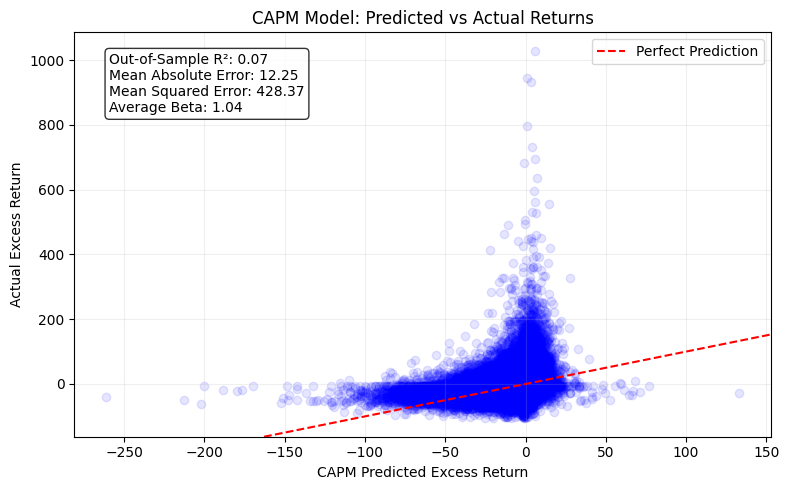

In [ ]:
plt.figure(figsize=(8, 5))

# Scatter plot of predicted vs actual
plt.scatter(test_data['CAPM_Predicted'], test_data['ExcessReturn'], alpha=0.1, color='blue')

# reference line (perfect prediction)
plt.axline([0, 0], [1, 1], color='red', linestyle='--', label='Perfect Prediction')

metrics_text = (
    f"Out-of-Sample R²: {r_squared_capm:.2f}\n"
    f"Mean Absolute Error: {mae_capm:.2f}\n"
    f"Mean Squared Error: {mse_capm:.2f}\n"
    f"Average Beta: {avg_beta:.2f}"
)

plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('CAPM Predicted Excess Return')
plt.ylabel('Actual Excess Return')
plt.title('CAPM Model: Predicted vs Actual Returns')
plt.grid(True, alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------


In [ ]:
predictor_vars = [c for c in merged_df.columns if c not in ['permno', 'date', 'prc', 'ret',	'Price', 'RiskFree', 'ExcessReturn']]
len(predictor_vars)

114

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

# Create masks for each period
train_mask = merged_df['date'] <= TRAIN_END
valid_mask = (merged_df['date'] > TRAIN_END) & (merged_df['date'] <= VALIDATION_END)
test_mask = merged_df['date'] > VALIDATION_END


In [ ]:
train_mask_features = mask_missing[mask_missing['date'] <= TRAIN_END][predictor_vars].copy()
valid_mask_features = mask_missing[(mask_missing['date'] > TRAIN_END) & (mask_missing['date'] <= VALIDATION_END)][predictor_vars].copy()
test_mask_features = mask_missing[mask_missing['date'] > VALIDATION_END][predictor_vars].copy()

train_mask_features

In [ ]:
# Extract features and target for each period
X_train = merged_df.loc[train_mask, predictor_vars].copy()
X_valid = merged_df.loc[valid_mask, predictor_vars].copy()
X_test = merged_df.loc[test_mask, predictor_vars].copy()

y_train = merged_df.loc[train_mask, 'ExcessReturn'].copy().fillna(0)
y_valid = merged_df.loc[valid_mask, 'ExcessReturn'].copy().fillna(0)
y_test = merged_df.loc[test_mask, 'ExcessReturn'].copy().fillna(0)

X_train

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to validation and test
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Clip validation and test to [-1, 1] to handle outliers
X_valid_scaled = np.clip(X_valid_scaled, -1, 1)
X_test_scaled = np.clip(X_test_scaled, -1, 1)

# replace initial nan/inf values with 0
X_train_scaled[mask_missing.loc[train_mask, predictor_vars]] = 0
X_valid_scaled[mask_missing.loc[valid_mask, predictor_vars]] = 0
X_test_scaled[mask_missing.loc[test_mask, predictor_vars]] = 0


# Convert back to DataFrames
X_train_processed = pd.DataFrame(X_train_scaled, columns=predictor_vars, index=X_train.index)
X_valid_processed = pd.DataFrame(X_valid_scaled, columns=predictor_vars, index=X_valid.index)
X_test_processed = pd.DataFrame(X_test_scaled, columns=predictor_vars, index=X_test.index)


In [ ]:
for dataset, name in [(X_train_processed, "Training"),
                      (X_valid_processed, "Validation"),
                      (X_test_processed, "Testing")]:
    print(f"\n{name} dataset:")
    print(f"Min values: {dataset.min().min():.4f}")
    print(f"Max values: {dataset.max().max():.4f}")
    print(f"NaN count: {dataset.isna().sum().sum()}")
    print(f"Sample size: {len(dataset)}")

# ML models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
import time
import os

# Check for GPU availability
try:
    import torch
    gpu_available = torch.cuda.is_available()
    if gpu_available:
        gpu_name = torch.cuda.get_device_name(0)
except ImportError:
    gpu_available = False


In [ ]:
def evaluate_model(model, model_name, X_train, y_train, X_valid, y_valid, X_test, y_test):
    print(f"---{model_name} Evaluation---")

    print(f"\nTraining...")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f"Training completed in {train_time:.2f} seconds")

    train_pred = model.predict(X_train)

    print("\nGenerating predictions...")
    start_time = time.time()
    valid_pred = model.predict(X_valid)
    test_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    print(f"Prediction completed in {pred_time:.2f} seconds")

    print("\nCalculating metrics...")
    results = {
        'train_mse': mean_squared_error(y_train, train_pred),
        'train_r2_oos': r2_oos(y_train, train_pred),
        'valid_mse': mean_squared_error(y_valid, valid_pred),
        'valid_r2_oos': r2_oos(y_valid, valid_pred),
        'test_mse': mean_squared_error(y_test, test_pred),
        'test_r2_oos': r2_oos(y_test, test_pred),
        'train_time': train_time,
        'pred_time': pred_time #test + valid
    }

    results['train_pred'] = train_pred
    results['valid_pred'] = valid_pred
    results['test_pred'] = test_pred

    print(f"""Train R² OOS: {results['train_r2_oos']:.2f} \nValidation R² OOS: {results['valid_r2_oos']:.2f} \nTest R² OOS: {results['test_r2_oos']:.2f}
              """)

    return results

In [ ]:
model_results = {}

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01, max_iter=10000),
    'Elastic Net': ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)
}

print(f"\nStarting model training and evaluation...")
print(f"Dataset sizes - Training: {X_train_processed.shape}, Validation: {X_valid_processed.shape}, Testing: {X_test_processed.shape}")
print()

for name in tqdm(list(models.keys()), desc="Models"):
    model = models[name]
    model_results[name] = evaluate_model(
        model, name,
        X_train_processed, y_train,
        X_valid_processed, y_valid,
        X_test_processed, y_test
    )


Starting model training and evaluation...
Dataset sizes - Training: (564350, 114), Validation: (229810, 114), Testing: (343866, 114)



Models:   0%|          | 0/6 [00:00<?, ?it/s]


Training Linear Regression...
Training completed in 10.69 seconds
Generating predictions...


Models:  17%|█▋        | 1/6 [00:11<00:56, 11.22s/it]

Prediction completed in 0.25 seconds
Calculating metrics...
Linear Regression - Validation R² OOS: 0.22, 
Test R² OOS: 0.22

Training Ridge...
Training completed in 1.56 seconds
Generating predictions...


Models:  33%|███▎      | 2/6 [00:13<00:23,  5.83s/it]

Prediction completed in 0.21 seconds
Calculating metrics...
Ridge - Validation R² OOS: 0.22, 
Test R² OOS: 0.22

Training Lasso...
Training completed in 304.10 seconds
Generating predictions...


Models:  50%|█████     | 3/6 [05:18<07:07, 142.34s/it]

Prediction completed in 0.30 seconds
Calculating metrics...
Lasso - Validation R² OOS: 0.22, 
Test R² OOS: 0.22

Training Elastic Net...
Training completed in 387.27 seconds
Generating predictions...


Models:  67%|██████▋   | 4/6 [11:46<07:58, 239.33s/it]

Prediction completed in 0.33 seconds
Calculating metrics...
Elastic Net - Validation R² OOS: 0.21, 
Test R² OOS: 0.20

Training Random Forest...
Training completed in 2053.07 seconds
Generating predictions...


Models:  83%|████████▎ | 5/6 [46:05<14:55, 895.65s/it]

Prediction completed in 3.15 seconds
Calculating metrics...
Random Forest - Validation R² OOS: 0.99, 
Test R² OOS: 0.99

Training Gradient Boosting...


In [ ]:
######### added part

model_results = {}

models = {
    'Random Forest': RandomForestRegressor(n_estimators=20, max_depth=3, min_samples_leaf=100, random_state=42, n_jobs=-1)
    # 'Gradient Boosting': GradientBoostingRegressor(n_estimators=10, max_depth=3, random_state=42)
}

print(f"\nStarting model training and evaluation...")
print(f"Dataset sizes - Training: {X_train_processed.shape}, Validation: {X_valid_processed.shape}, Testing: {X_test_processed.shape}")
print()

for name in tqdm(list(models.keys()), desc="Models"):
    model = models[name]
    model_results[name] = evaluate_model(
        model, name,
        X_train_processed.drop(columns=['STreversal']), y_train,
        X_valid_processed.drop(columns=['STreversal']), y_valid,
        X_test_processed.drop(columns=['STreversal']), y_test
    )

In [ ]:
print("\nModel Comparison (Test R² OOS):")
print(f'CAPM: {r_squared_capm:.3f}')
for name, results in model_results.items():
    print(f"{name}: {results['test_r2_oos']:.3f} (Training: {results['train_time']:.3f}s, Prediction: {results['pred_time']:.3f}s)")

In [ ]:
# Feature importance for tree-based models
if 'Random Forest' in model_results:
    rf_model = models['Random Forest']
    rf_importances = pd.DataFrame({
        'feature': predictor_vars,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 Important Features (Random Forest):")
    print(rf_importances.head(10))

if 'Gradient Boosting' in model_results:
    gb_model = models['Gradient Boosting']
    gb_importances = pd.DataFrame({
        'feature': predictor_vars,
        'importance': gb_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\nTop 10 Important Features (Gradient Boosting):")
    print(gb_importances.head(10))

# System resource information
print("\nSystem Resource Information:")
print(f"Memory usage of training data: {X_train_processed.memory_usage().sum() / (1024**2):.2f} MB")
print(f"Number of processors: {os.cpu_count()}")